# Analisis Univariado del Proyecto

In [79]:
# Importamos las librerias a utilizar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
#Importamos y revisamos la data
df = pd.read_excel("data_final.xlsx")
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## 1. Caracteristicas del DataFrame

In [81]:
# Revisamos la dimension del df
df.shape

(319795, 18)

In [82]:
# Vemos un resumen de las caracteristicas del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [83]:
# Revisamos las principales caracteristicas estadisticas del df
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


Nuestros datos indican distintas caracteristicas del sector salud. Tenemos 18 variables y un total de 319,795 observaciones. No hay datos faltantes.

***

## 2. Graficos

### 2.1 Grafico de Barras
Para los graficos usaremos la data de "SleepTime". Esta variable nos indica las horas de sueño de los pacientes. Analisaremos los datos para hallar cuales son las horas de sueño mas comunes.

In [96]:
# Revisamos las caracteristicas estadisticas
df.SleepTime.describe()

count    319795.000000
mean          7.097075
std           1.436007
min           1.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          24.000000
Name: SleepTime, dtype: float64

In [85]:
# Dado que solo trabajaremos con "SleepTime", crearemos un nuevo dataframe para aligerar la data.
df_st = pd.DataFrame(df["SleepTime"])
df_st.head()

,SleepTime
0,5.0
1,7.0
2,8.0
3,6.0
4,8.0


<AxesSubplot:xlabel='SleepTime'>

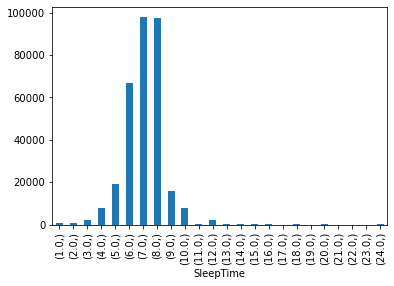

In [86]:
# Creamos el grafico de barras ordenado por las horas de sueño.
df_st.value_counts().sort_index().plot.bar()

### 2.2 Grafico de torta
Crearemos un grafico de torta que nos muestre el top 5 de las horas de sueño.

In [87]:
# Armaremos un nuevo dataframe, seleccionando unicamente el top 5 de las horas de sueño. El resto de las horas las agruparemos como "otros":
nuevo = pd.DataFrame(df["SleepTime"].value_counts().reset_index())
df_top5 = nuevo[:5].copy()
df_top5

,index,SleepTime
0,7.0,97751
1,8.0,97602
2,6.0,66721
3,5.0,19184
4,9.0,16041


In [88]:
# Creamos una lista con los Labels a usar:
labels =list(df_top5["index"])
labels = [str(x) + " Horas" for x in labels]
labels.append("otros")
labels

['7.0 Horas', '8.0 Horas', '6.0 Horas', '5.0 Horas', '9.0 Horas', 'otros']

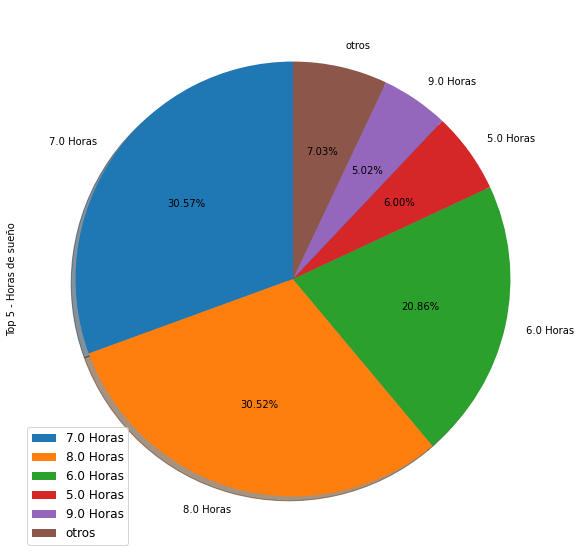

In [100]:
# Sumamos la data del resto de horas y las añadimos a "otros". Finalmente graficamos.
df_top5.loc["otros"] = nuevo['SleepTime'][5:].sum()
fig, ax = plt.subplots(figsize = (10,10))
df_top5.plot(kind = 'pie', 
             y = 'SleepTime', 
             autopct='%1.2f%%', 
             ax = ax, 
             label="Top 5 - Horas de sueño", 
             labels = labels, 
             startangle=90, 
             shadow = True)
plt.legend(fontsize = 12, loc="lower left")

### 2.3 Grafico de  Caja

<AxesSubplot:xlabel='SleepTime'>

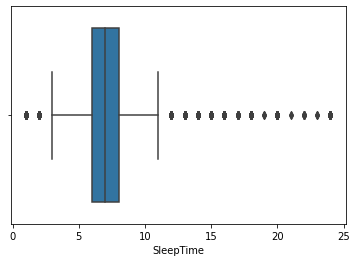

In [90]:
# Creamos un boxplot para ver los outliers
sns.boxplot(x = df_st["SleepTime"], data = df_st)

Se observa que la cantidad de horas de sueño mas comunes son 6, 7 y 8 horas, que representan mas del 75% de las observaciones. Tambien hay datos extremos que van desde 1 hora("insomnio extremo"), hasta 24 horas de sueño("hipersomnia").

---

## 3. Distribución de frecuencias para SleepTime
Crearemos un nuevo dataframe con la distribución de frecuencias de las horas de sueño

In [91]:
# Iniciamos creando el dataframe, con los datos de SleepTime, ordenados, y cambiando el nombre a Frecuencia Absoluta ("F_Abso")
HS_df = pd.DataFrame(df["SleepTime"].value_counts().sort_index())
HS_df.rename(columns = {"SleepTime":"F_Abso"}, inplace=True)
HS_df.head()

,F_Abso
1.0,551
2.0,788
3.0,1992
4.0,7750
5.0,19184


In [92]:
# Creamos la columna de Frecuencias Absolutas Acumuladas ("F_Abso_Acu").
valores = HS_df["F_Abso"].values
acumulada = []
valor = 0
for x in valores:
    valor = valor + x
    acumulada.append(valor)
    
HS_df["F_Abso_Acu"] = acumulada
HS_df.head()

,F_Abso,F_Abso_Acu
1.0,551,551
2.0,788,1339
3.0,1992,3331
4.0,7750,11081
5.0,19184,30265


In [93]:
# Agregamos la columna de Frecuencia relativa ("F_Rel_%")
HS_df["F_Rel_%"] = 100 * HS_df["F_Abso"]/len(df.SleepTime)
HS_df.head()

,F_Abso,F_Abso_Acu,F_Rel_%
1.0,551,551,0.172298
2.0,788,1339,0.246408
3.0,1992,3331,0.622899
4.0,7750,11081,2.423428
5.0,19184,30265,5.998843


In [94]:
# Agregamos la Frecuencia Relativa Acumulada ("F_Rel_%_Acu")
valores2 = HS_df["F_Rel_%"].values
acumulada2 = []
valor2 = 0
for x in valores2:
    valor2 = valor2 + x
    acumulada2.append(valor2)
    
HS_df["F_Rel_%_Acu"] = acumulada2

In [95]:
# Finalmente visualizamos la tabla completa
HS_df

,F_Abso,F_Abso_Acu,F_Rel_%,F_Rel_%_Acu
1.0,551,551,0.172298,0.172298
2.0,788,1339,0.246408,0.418706
3.0,1992,3331,0.622899,1.041605
4.0,7750,11081,2.423428,3.465032
5.0,19184,30265,5.998843,9.463875
6.0,66721,96986,20.863678,30.327554
7.0,97751,194737,30.566769,60.894323
8.0,97602,292339,30.520177,91.414500
9.0,16041,308380,5.016026,96.430526
10.0,7796,316176,2.437812,98.868338
